In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
fake=pd.read_csv("C:\\Users\\prave\\datasets\\csv files\\NLP dataset\\fake and real\\Fake.csv")

true=pd.read_csv("C:\\Users\\prave\\datasets\\csv files\\NLP dataset\\fake and real\\True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(true.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of publication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [6]:
# Hence we have a list of indices where publisher is not mentioned
true.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [7]:
# separating publishers from the news text
publisher = []
tmp_text = []
for index, row in enumerate(true.text.values):
    if index in unknown_publishers:
        # add text to tmp_text and "unknown" to publishers
        #tmp_text.append(row)
        tmp_text.append(row)
        publisher.append("Unknown")
        continue
    record = row.split(' -', maxsplit=1)
    tmp_text.append(record[1])
    publisher.append(record[0])

In [8]:
# changing the dataframe by replacing text column by temp_text and adding publisher column 
true['publisher']=publisher
true['text']=tmp_text

In [9]:
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [10]:
# checking for empty text
[index for index,text in enumerate(true.text.values) if str(text.strip())==""]

[8970]

In [11]:
true.drop(8970,axis=0,inplace=True)

In [12]:
# checking empty text in fake news also
empty_fake_rows=[index for index,text in enumerate(fake.text.values) if str(text.strip())==""]
print(f'No.Of Empty Rows:{len(empty_fake_rows)}')
fake.iloc[empty_fake_rows].head()

No.Of Empty Rows:630


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"


In [13]:
# Combining title and text because in fake news some of the titles containing text also
fake['text']=fake['text'] + " " + fake['title']
true['text']=true['text'] + " " + true['title']

In [14]:
# drop Date , title and publication features
fake.drop(['subject','date','title'],axis=1,inplace=True)
true.drop(['subject','date','title','publisher'],axis=1,inplace=True)

In [15]:
# Adding clss info
true['class']=1
fake['class']=0

In [16]:
# Combining both Fake and Treu into dataframe
df=fake.append(true,ignore_index=True)

### Split the dataset

In [17]:
x=df['text']
y=df['class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("X_train shape: {} ,X_test size: {}".format(X_train.shape,X_test.shape))

X_train shape: (31427,) ,X_test size: (13470,)


In [18]:
# Creating bag of words with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
count_train=cv.fit_transform(X_train)
count_test=cv.transform(X_test)

In [19]:
# Creating bag of words with TFID-DF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')
tf_train=tf.fit_transform(X_train)
tf_test=tf.transform(X_test)

# Model Building

### Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

#### Training and Testing the model with Countvectorizer

In [21]:
nb=MultinomialNB()
nb.fit(count_train,y_train)
count_pred=nb.predict(count_test)
score=accuracy_score(y_test,count_pred)

In [22]:
print(score)

0.9471417965850037


In [23]:
cm=confusion_matrix(y_test,count_pred)
print(cm)

[[6696  329]
 [ 383 6062]]


<AxesSubplot:>

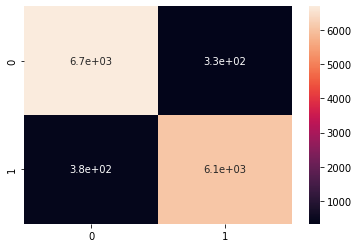

In [24]:
sns.heatmap(cm,annot=True)

#### Training and Testing the model with TfidVectorizer

In [25]:
nb=MultinomialNB()
nb.fit(tf_train,y_train)
tf_pred=nb.predict(tf_test)
score=accuracy_score(y_test,tf_pred)

In [26]:
print(score)

0.9349665924276169


In [27]:
cm=confusion_matrix(y_test,tf_pred)
print(cm)

[[6639  386]
 [ 490 5955]]


<AxesSubplot:>

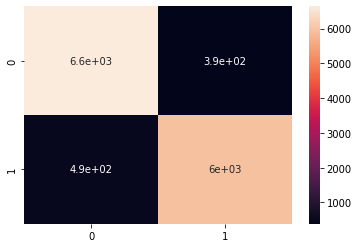

In [28]:
sns.heatmap(cm,annot=True)

## Simple NLP

In [29]:
alphas=np.arange(0,1,0.1)

In [30]:
def train_and_predict(alpha):
    nb=MultinomialNB(alpha=alpha)
    nb.fit(count_train,y_train)
    pred=nb.predict(count_test)
    score=accuracy_score(y_test,pred)
    return score

In [31]:
for alpha in alphas:
    print('Alpha:',alpha)
    print("Score:",train_and_predict(alpha))
    print()

Alpha: 0.0
Score: 0.9492204899777282

Alpha: 0.1
Score: 0.9505567928730512

Alpha: 0.2
Score: 0.949517446176689

Alpha: 0.30000000000000004
Score: 0.9488492947290275

Alpha: 0.4
Score: 0.9482553823311062

Alpha: 0.5
Score: 0.948181143281366

Alpha: 0.6000000000000001
Score: 0.948181143281366

Alpha: 0.7000000000000001
Score: 0.9478841870824053

Alpha: 0.8
Score: 0.9475129918337045

Alpha: 0.9
Score: 0.947290274684484



In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(count_train, y_train)

MultinomialNB(alpha=0.1)

In [33]:
pipeline=Pipeline([('cv',CountVectorizer(stop_words='english')),('nb',MultinomialNB(alpha=0.1))])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB(alpha=0.1))])

In [34]:
pred=pipeline.predict(X_test)

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7025
           1       0.96      0.94      0.95      6445

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [36]:
print(confusion_matrix(y_test,pred))

[[6741  284]
 [ 382 6063]]


# Saving The Model

In [37]:
import pickle